Project statement:

This project works to cluster the resume_title column and try to retrieve the core information about this dataset.
In detail, the expectation is to see which categories/topic that this dataset is about. From here, the train set and test set for final thesis can avoid mismatch

In [ ]:
import re
import nltk
import spacy
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Quynhfox\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Quynhfox\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df = pd.read_csv('Resume_processing.csv')
print(df.shape)
df.head(1)

(14462, 9)


,Resume_title,City,State,Description,work_experiences,Educations,Skills,Certificates,Additional Information
0,Java Developer,Tirur,Kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...","{0: [{'c_title:': 'Java Developer'}, {'c_durat...",\nTechnical Expertise \n?? Operating Systems:...


In [32]:
print(df.isnull().sum())

Resume_title              6
City                      4
State                     4
Description               4
work_experiences          6
Educations                8
Skills                    8
Certificates              8
Additional Information    8
dtype: int64


In [33]:
df = df.dropna(axis = 0, how ='any')
print(df.shape)

(14454, 9)


In [39]:
df['Cleaned_Resume'] = df.Resume_title
df.head()

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Certificates,Additional Information,Cleaned_Resume
0,java developer,tirur,kerala,"to prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'java developer'}, {'wcompany...","{0: [{'e_title:': ""bachelor's in bachelor of c...","['java (less than 1 year)', ' jsp (less than 1...","{0: [{'c_title:': 'java developer'}, {'c_durat...",\ntechnical expertise \n?? operating systems:...,java developer
1,software developer,bengaluru,karnataka,working as software developer at ingroinfo sof...,"{0: [{'wtitle:': 'java developer'}, {'wcompany...",{0: [{'e_title:': 'mca in master of computer a...,"['programming languages: core java', ' j2ee \n...",{},none,software developer
2,java developer,pune,maharashtra,looking for a challenging career which demands...,"{0: [{'wtitle:': 'java developer'}, {'wcompany...","{0: [{'e_title:': ""bachelor's in electrical en...","['eclipse (1 year)', ' hibernate', ' spring (l...",{},"\ntechnical skills \n \nframeworks: spring, sp...",java developer
3,seeking innovative and challenging career assi...,pune,maharashtra,none,"{0: [{'wtitle:': 'java developer'}, {'wcompany...","{0: [{'e_title:': 'be in computer'}, {'e_schoo...","['git', ' angular 7', ' maven', ' java', ' jen...",{},none,seeking innovative and challenging career assi...
4,none,pune,maharashtra,none,"{0: [{'wtitle:': 'java developer'}, {'wcompany...",{0: [{'e_title:': 'bachelor of engineering in ...,['project: hr payroll systems role: java devel...,{},none,none


In [42]:
#Lower Casing

for columns in df.columns:
    df[columns] = df[columns].str.lower()
    df[columns] = df[columns].str.replace('[^\w\s]+', '')
df.head(1)

<ipython-input-42-6b38b3250908>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[columns] = df[columns].str.replace('[^\w\s]+', '')


,Resume_title,City,State,Description,work_experiences,Educations,Skills,Certificates,Additional Information,Cleaned_Resume
0,java developer,tirur,kerala,to prove myself dedicated worthy and energetic...,0 wtitle java developer wcompany n wcity none ...,0 e_title bachelors in bachelor of computer ap...,java less than 1 year jsp less than 1 year j...,0 c_title java developer c_duration june 2019 ...,\ntechnical expertise \n operating systems win...,java developer


In [43]:
#getting the entire resume text
corpus=" "
for i in range(0,14454):
    corpus= corpus+ ' ' + df["Cleaned_Resume"].iloc[i]

In [44]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS

all_stopwords_gensim = STOPWORDS.union(set(['possess', 'collections','new','high', 'learning','india', 'desire', 'capability', 'good','opportunity', 
                   'presentation', '8','7','9','skills', 'utilizing','6',  'skills','also', 'currently', 'living', 'delhi','provide',
                   'please', 'let', 'know', 'completed',  'certification', 'knowledge', 'best', 'abilities', 'contribute', 'positively', 
                   'personal', 'growth', 'well', 'growth', 'organization', 'thinking', 'ability', 'work','mca', 'searching','innovative', 
                   'career', 'assignment','year', '1','2','3', '4','none','seeking', 'looking', 'chance', 'experience', 'experienced', 'working', 
                   'job', 'jobs', 'years', 'position', 'required', 'tata', 'consultancy', 'services', 'limited', 'brvisioninfotech alwar','challenging',
                   'ltd', 'searching', 'role', 'excellent','dedicated', 'prove', 'get', 'house', 'never', 'regret', 'hiring', 'positive', 'attitude', 
                   'towards', 'life', 'assure','skill', 'correlate', 'extract', 'kind', 'data', 'provided', 'ultimate', 'goal', 'make', 'contribution', 
                   'efficient', 'fastest', 'model','self', 'give', 'organisation', 'capable', 'following', 'established','30', '45', 'days', 'none', 'none',
                   'in', 'improve', 'none', 'aunico', 'finding', 'none', '2', 'knowledge', 'ktu',' 2', 'notice', 'period','bent', 'mind', 'better', 'communication']))

tokens_vs_stop = word_tokenize(corpus)
fin_corpus = [word for word in tokens_vs_stop if not word in all_stopwords_gensim]

print(len(fin_corpus))

28364


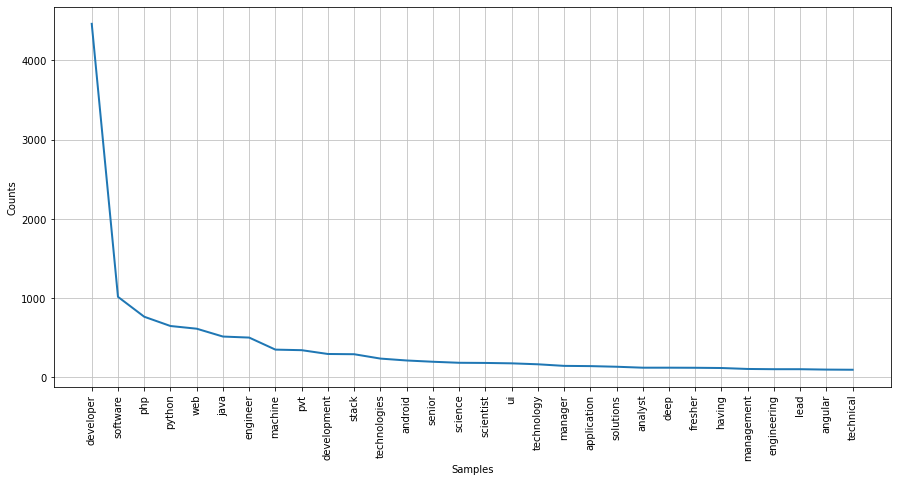

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
freq_dist = nltk.FreqDist(fin_corpus)
plt.subplots(figsize=(15,7))
freq_dist.plot(30)

In [46]:
mostcommon = freq_dist.most_common(50)
mostcommon

[('developer', 4461),
 ('software', 1016),
 ('php', 765),
 ('python', 648),
 ('web', 614),
 ('java', 515),
 ('engineer', 502),
 ('machine', 350),
 ('pvt', 343),
 ('development', 295),
 ('stack', 292),
 ('technologies', 237),
 ('android', 213),
 ('senior', 197),
 ('science', 184),
 ('scientist', 182),
 ('ui', 177),
 ('technology', 165),
 ('manager', 145),
 ('application', 142),
 ('solutions', 134),
 ('analyst', 122),
 ('deep', 122),
 ('fresher', 121),
 ('having', 118),
 ('management', 106),
 ('engineering', 103),
 ('lead', 103),
 ('angular', 98),
 ('technical', 96),
 ('sr', 95),
 ('professional', 93),
 ('end', 93),
 ('business', 92),
 ('sql', 88),
 ('django', 88),
 ('ai', 85),
 ('project', 81),
 ('associate', 80),
 ('frontend', 79),
 ('hadoop', 74),
 ('javascript', 72),
 ('team', 71),
 ('analytics', 70),
 ('js', 68),
 ('consultant', 67),
 ('auditor', 67),
 ('html', 65),
 ('ios', 65),
 ('vision', 64)]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
#Count Vectoriser then tidf transformer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(fin_corpus)

#vectorizer.get_feature_names()

#print(X.toarray())     

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )                        

(28364, 3806)


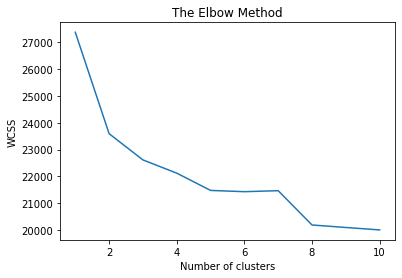

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [66]:
num_clusters = 3 #Change it according to your data.
km = KMeans(n_clusters=num_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
km.fit(tfidf)
clusters = km.labels_.tolist()

In [67]:
idea={'Idea':fin_corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame= pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.
print("\n")
print(frame.head) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.



<bound method NDFrame.head of            Idea  Cluster
0          java        0
1     developer        1
2      software        2
1     developer        1
0          java        0
..          ...      ...
0           cro        0
0        office        0
0    operations        0
0            hr        0
0   coordinator        0

[28364 rows x 2 columns]>


0    22887
1     4461
2     1016
Name: Cluster, dtype: int64


In [68]:
# 3 Clusters
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(fin_corpus[word] for word in centroid))

C:\Users\Quynhfox\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : python, tremendously, pl, pvt, developer, aspnet, infotech, pvt, bsc, insurance, kafka, field, player, challenges, assurance, architect, senior, ui, leader, technician, technical, enable, laravel, developer, php
1 : codeigniter, pvt, management, associate, rajendran, poovizhi, developer, php, developer, web, php, development, php, program, internship, developer, php, canada, planning, developer, web, developer, php, developer, php
2 : business, pvt, developer, associate, rajendran, poovizhi, developer, php, developer, web, php, development, php, program, internship, php, developer, canada, planning, developer, web, developer, php, developer, php


In [69]:
# 5 Clusters
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(fin_corpus[word] for word in centroid))

C:\Users\Quynhfox\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : python, tremendously, pl, pvt, developer, pvt, bsc, insurance, kafka, field, player, challenges, assurance, architect, senior, ui, leader, technician, technical, enable, laravel, developer, php, php, javascriptjquery
1 : business, pvt, developer, associate, rajendran, poovizhi, developer, php, developer, web, php, development, php, program, internship, php, developer, canada, planning, developer, web, developer, php, developer, php
2 : codeigniter, pvt, management, associate, rajendran, poovizhi, developer, php, developer, web, php, development, php, program, internship, developer, php, canada, planning, developer, web, developer, php, developer, php
3 : infotech, pvt, developer, rajendran, poovizhi, developer, php, developer, web, php, development, php, program, internship, php, php, canada, planning, developer, web, developer, php, developer, php, developer
4 : aspnet, pvt, developer, associate, rajendran, poovizhi, developer, php, developer, web, php, development, php, program, 